# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [5]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [6]:
path = input_file_directory + "mefs/glucose_lactate/"

# NEED TO NORMALIZE

# II] Glucose

In [97]:
%%time
# DL data ATG7 isoform expression
df_glu = pandas.read_csv(path+'glucose_exp1.csv', sep = ";")
print(df_glu)
df_glu = df_glu.T
df_glu.reset_index(inplace=True)
df_glu

   DMSO    WT  0,9596  0,9938
0  DMSO    EV  0,9766  0,9855
1  DMSO  iso1  0,9745   0,941
2  DMSO  iso2  0,9908  0,9936
3   BAF    WT  0,9914  0,9713
4   BAF    EV  0,9864  0,9895
5   BAF  iso1  0,9412  1,0032
6   BAF  iso2  0,9393  0,9746
Wall time: 5.98 ms


,index,0,1,2,3,4,5,6
0,DMSO,DMSO,DMSO,DMSO,BAF,BAF,BAF,BAF
1,WT,EV,iso1,iso2,WT,EV,iso1,iso2
2,"0,9596","0,9766","0,9745","0,9908","0,9914","0,9864","0,9412","0,9393"
3,"0,9938","0,9855","0,941","0,9936","0,9713","0,9895","1,0032","0,9746"


In [98]:
df_glu.reset_index(inplace= True, drop=True)
df_glu_dmso = df_glu.iloc[:,:4]
df_glu_baf = df_glu.iloc[:,4:]

for df in df_glu_dmso, df_glu_baf:
    df.columns = df.iloc[1]

df_glu_dmso

1,WT,EV,iso1,iso2
0,DMSO,DMSO,DMSO,DMSO
1,WT,EV,iso1,iso2
2,"0,9596","0,9766","0,9745","0,9908"
3,"0,9938","0,9855","0,941","0,9936"


In [99]:
df_glu_dmso = df_glu_dmso.drop(df.index[0:2])
df_glu_baf = df_glu_baf.drop(df.index[0:2])


   cells   value        x
0    WT  0.9596  Glucose
1    WT  0.9938  Glucose
2    EV  0.9766  Glucose
3    EV  0.9855  Glucose
4  iso1  0.9745  Glucose
5  iso1  0.9410  Glucose
6  iso2  0.9908  Glucose
7  iso2  0.9936  Glucose

   cells   value        x
0    WT  0.9914  Glucose
1    WT  0.9713  Glucose
2    EV  0.9864  Glucose
3    EV  0.9895  Glucose
4  iso1  0.9412  Glucose
5  iso1  1.0032  Glucose
6  iso2  0.9393  Glucose
7  iso2  0.9746  Glucose


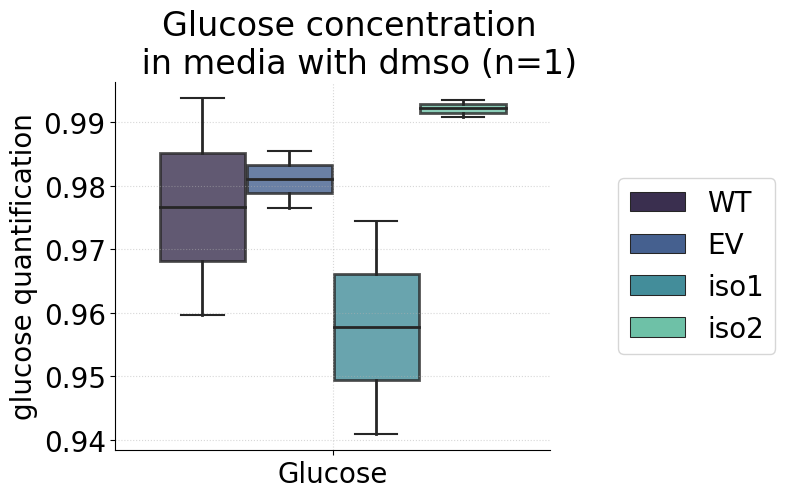

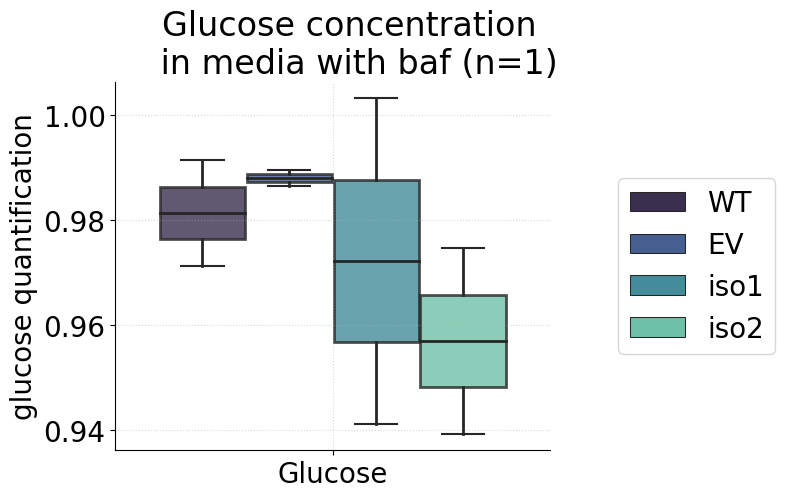

In [100]:
dfs = df_glu_dmso, df_glu_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    info = infos[i]
    
    df = df.melt(var_name="cells") #convert wide to long df   
    df.dropna(axis=0, inplace = True) #drop Nan
    df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df['value'] = df['value'].astype(float)
    df['x'] = 'Glucose'
    print('\n', df)
    
    #graph
    seaborn.catplot(x="x", y="value", hue="cells", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('glucose quantification')
    plt.xlabel('')
    plt.title('Glucose concentration \n in media with '+ info + ' (n=1)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))  

# I] Lactate

In [101]:
%%time
# DL data ATG7 isoform expression
df_lact = pandas.read_csv(path+'lactate_exp1.csv', sep = ";")
print(df_lact)
df_lact = df_lact.T
df_lact.reset_index(inplace=True)
df_lact

   DMSO    WT  1,3503  1,3204  1,3232
0  DMSO    EV  1,3173  1,3516     NaN
1  DMSO  iso1  1,3203  1,3257     NaN
2  DMSO  iso2  1,4408  1,4196  1,4291
3   BAF    WT  1,3198   1,342     NaN
4   BAF    EV  1,3557  1,3179  1,3302
5   BAF  iso1  1,3238  1,3425     NaN
6   BAF  iso2  1,4272  1,4018     NaN
Wall time: 6.99 ms


,index,0,1,2,3,4,5,6
0,DMSO,DMSO,DMSO,DMSO,BAF,BAF,BAF,BAF
1,WT,EV,iso1,iso2,WT,EV,iso1,iso2
2,"1,3503","1,3173","1,3203","1,4408","1,3198","1,3557","1,3238","1,4272"
3,"1,3204","1,3516","1,3257","1,4196","1,342","1,3179","1,3425","1,4018"
4,"1,3232",NaN,NaN,"1,4291",NaN,"1,3302",NaN,NaN


In [102]:
df_lact.reset_index(inplace= True, drop=True)
df_lact_dmso = df_lact.iloc[:,:4]
df_lact_baf = df_lact.iloc[:,4:]

for df in df_lact_dmso, df_lact_baf:
    df.columns = df.iloc[1]

df_lact_dmso

1,WT,EV,iso1,iso2
0,DMSO,DMSO,DMSO,DMSO
1,WT,EV,iso1,iso2
2,"1,3503","1,3173","1,3203","1,4408"
3,"1,3204","1,3516","1,3257","1,4196"
4,"1,3232",NaN,NaN,"1,4291"


In [103]:
df_lact_dmso = df_lact_dmso.drop(df.index[0:2])
df_lact_baf = df_lact_baf.drop(df.index[0:2])


    cells   value        x
0     WT  1.3503  Lactate
1     WT  1.3204  Lactate
2     WT  1.3232  Lactate
3     EV  1.3173  Lactate
4     EV  1.3516  Lactate
6   iso1  1.3203  Lactate
7   iso1  1.3257  Lactate
9   iso2  1.4408  Lactate
10  iso2  1.4196  Lactate
11  iso2  1.4291  Lactate

    cells   value        x
0     WT  1.3198  Lactate
1     WT  1.3420  Lactate
3     EV  1.3557  Lactate
4     EV  1.3179  Lactate
5     EV  1.3302  Lactate
6   iso1  1.3238  Lactate
7   iso1  1.3425  Lactate
9   iso2  1.4272  Lactate
10  iso2  1.4018  Lactate


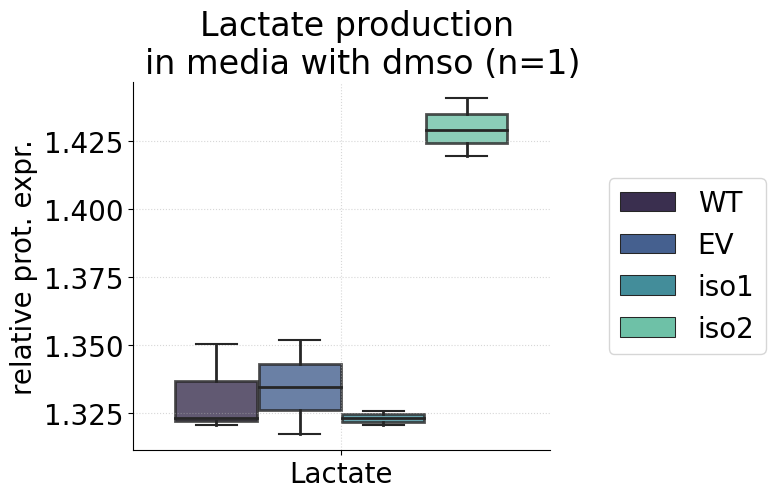

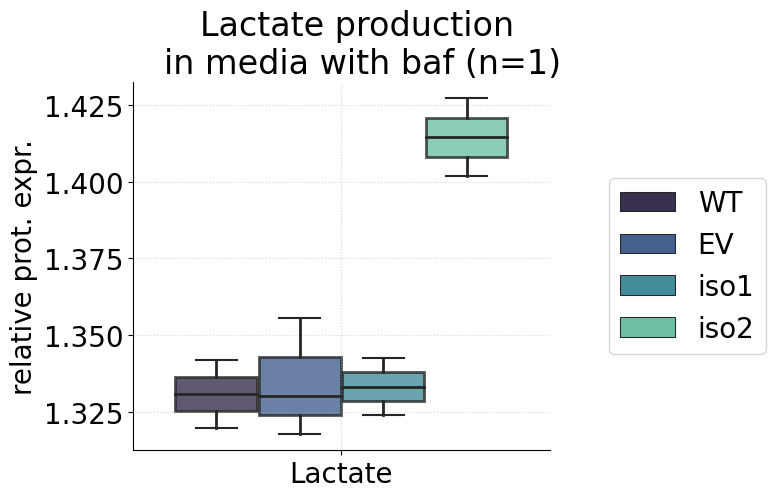

In [104]:
dfs = df_lact_dmso, df_lact_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    info = infos[i]
    
    df = df.melt(var_name="cells") #convert wide to long df   
    df.dropna(axis=0, inplace = True) #drop Nan
    df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df['value'] = df['value'].astype(float)
    df['x'] = 'Lactate'
    print('\n', df)
    
    #graph
    seaborn.catplot(x="x", y="value", hue="cells", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Lactate production \nin media with '+ info + ' (n=1)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))  